Por: Soraia Pinheiro Ribeiro </br></br>
Base de dados utilizada para o estudo de caso do projeto:
</br>
Salary Prediction dataset</br>
https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer </br>

# **Ciência de dados aplicada à gestão de pessoas: um estudo com modelos de machine learning para a predição de salários**


Os atributos contidos nos dados:</br>
1- Age: idade</br>
2 - Gender: gênero</br>
3 - Education Level: nível de escolaridade</br>
4 - Job Title: cargo</br>
5 - Years of Experience: tempo de experiência</br>
6 - Salary: renda

## **Leitura e limpeza dos dados**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregando o conjunto de dados
dados = pd.read_csv('/content/drive/MyDrive/MBA Data Science/3. Metodologia científica/Dataset/salary_dataset.csv', header=(0))
dados.head()
print('Número de linhas e colunas da base:',dados.shape)

Número de linhas e colunas da base: (375, 6)


In [ ]:
#Limpeza dos dados

# Tratando valores ausentes (substituindo NaN, por exemplo, pela média dos valores na coluna)
dados = dados.fillna(dados.mean())

# Salvando o conjunto de dados limpo em um novo arquivo
dados.to_csv('dados_limpos.csv', index=False)


<ipython-input-2-72e81720efde>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados = dados.fillna(dados.mean())


## **Divisão dos conjuntos de treinamento e teste**

In [ ]:
dados = pd.read_csv('dados_limpos.csv', header=(0))
print('Número de linhas e colunas da base limpa:', dados.shape)
# Dividindo o conjunto de dados em treinamento e teste
train, test = train_test_split(dados, test_size=0.2, random_state=42)

# Imprimindo o número de linhas e colunas em cada conjunto
print("Número de linhas e colunas no conjunto de treinamento:", train.shape)
print("Número de linhas e colunas no conjunto de teste:", test.shape)

# Visualizando as primeiras linhas do conjunto de treinamento
train.head(10)

Número de linhas e colunas da base limpa: (375, 6)
Número de linhas e colunas no conjunto de treinamento: (300, 6)
Número de linhas e colunas no conjunto de teste: (75, 6)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
193,34.0,Male,Bachelor's,Senior Product Manager,7.0,95000.0
75,37.0,Male,Bachelor's,Project Manager,10.0,95000.0
84,29.0,Female,Bachelor's,Junior Designer,2.0,40000.0
363,33.0,Male,Bachelor's,Junior Marketing Specialist,5.0,70000.0
16,33.0,Female,Master's,Marketing Manager,7.0,90000.0
66,46.0,Male,Bachelor's,IT Manager,19.0,120000.0
284,35.0,Male,Bachelor's,Senior Financial Manager,9.0,100000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
113,32.0,Male,Master's,Senior Business Analyst,6.0,90000.0
116,40.0,Female,Bachelor's,Office Manager,15.0,65000.0


In [ ]:
train.isnull().sum().sort_values(ascending=False).head(10)

Gender                 1
Education Level        1
Job Title              1
Age                    0
Years of Experience    0
Salary                 0
dtype: int64

In [ ]:
test.isnull().sum().sort_values(ascending=False).head(10)

Gender                 1
Education Level        1
Job Title              1
Age                    0
Years of Experience    0
Salary                 0
dtype: int64

## **Análise exploratória**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Inicialmente, vamos analisar a correlação entre os atributos.

<ipython-input-84-4c923f6e0944>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


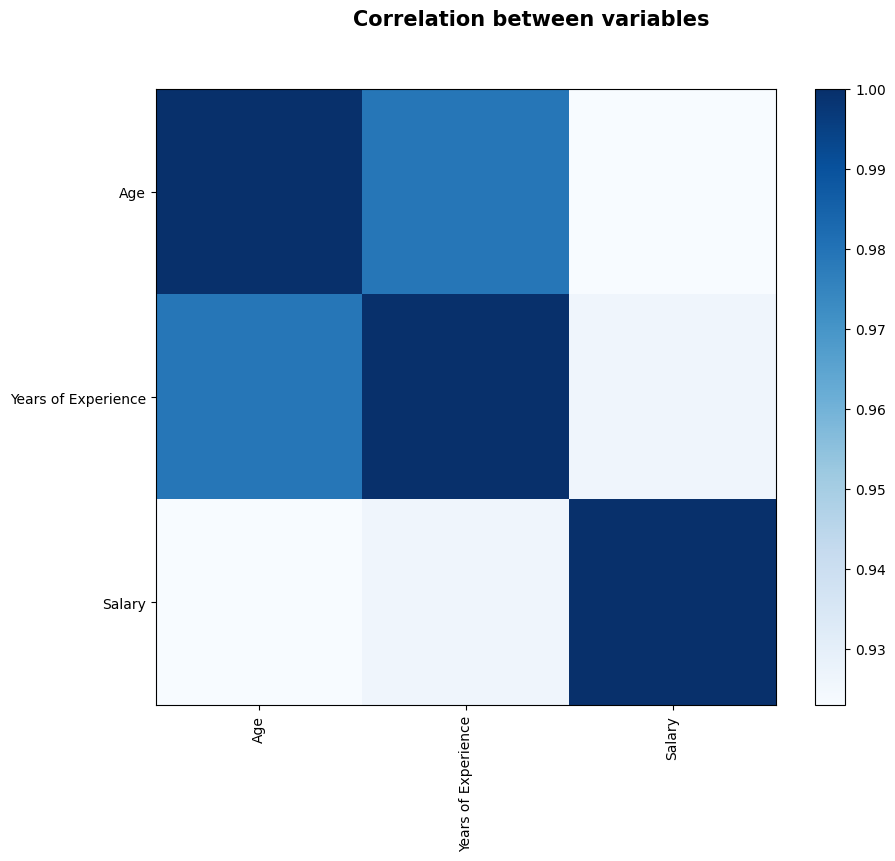

In [ ]:
corr = train.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

**Comparação entre nível de escolaridade e gênero**

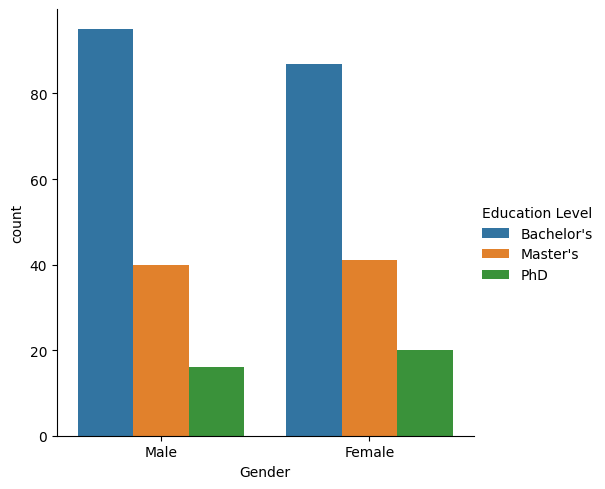

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
sns.catplot(x ="Gender", hue ="Education Level",
kind ="count", data = train)

<Axes: xlabel='Gender', ylabel='Education Level'>

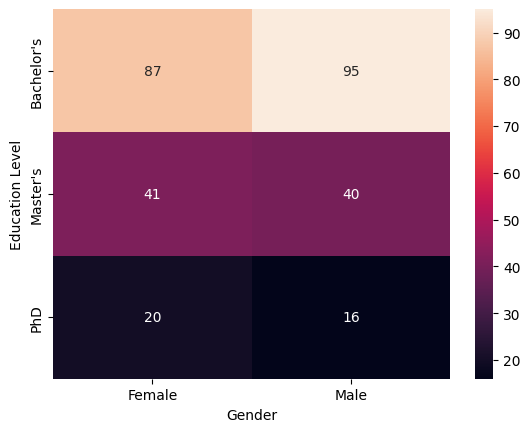

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

group = train.groupby(['Education Level', 'Gender'])
edulevel_salary = group.size().unstack()
sns.heatmap(edulevel_salary, annot = True, fmt ="d")

**Comparação entre nível de escolaridade e anos de experiência, por gênero.**

<Axes: xlabel='Education Level', ylabel='Years of Experience'>

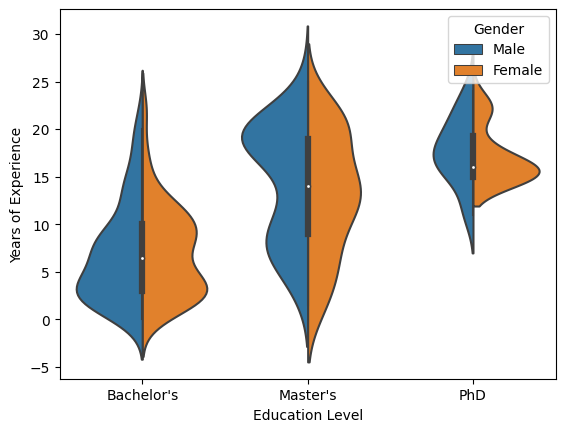

In [ ]:
sns.violinplot(x ="Education Level", y ="Years of Experience", hue ="Gender",
data = train, split = True)

**Comparando a faixa salarial com o tempo de experiência**

<Axes: xlabel='Salary_Range', ylabel='Years of Experience'>

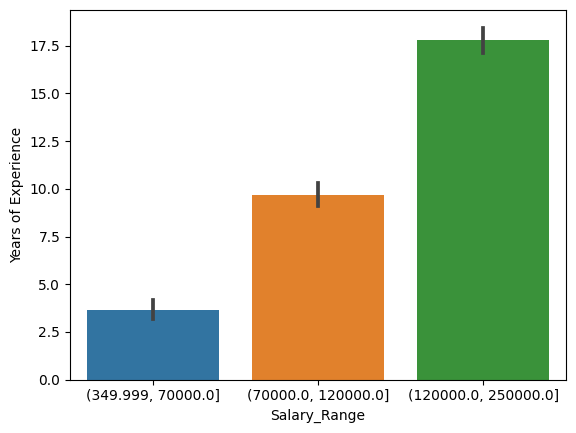

In [ ]:
train['Salary_Range'] = pd.qcut(train['Salary'], 3)

# Barplot - Shows approximate values based on the height of bars.
sns.barplot(x ='Salary_Range', y ='Years of Experience',
data = train)

**Comparando a faixa salarial com a idade**

<Axes: xlabel='Salary_Range', ylabel='Age'>

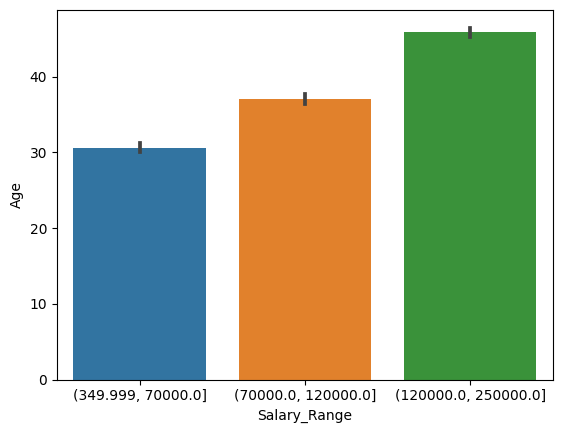

In [ ]:
train['Salary_Range'] = pd.qcut(train['Salary'], 3)

# Barplot - Shows approximate values based on the height of bars.
sns.barplot(x ='Salary_Range', y ='Age',
data = train)

**Tabela comparativa**

In [ ]:
import pandas as pd

# Dividir os conjunto de treinamento por gênero
train_mulheres = train[train['Gender'] == 'Female']
train_homens = train[train['Gender'] == 'Male']

# Calcular estatísticas resumidas para os atributos para cada gênero
resumo_mulheres = train_mulheres[['Years of Experience', 'Education Level', 'Salary']].describe()
resumo_homens = train_homens[['Years of Experience', 'Education Level', 'Salary']].describe()

# Concatenar os resumos em uma única tabela
tabela_comparativa = pd.concat([resumo_mulheres, resumo_homens], axis=1, keys=['Mulheres', 'Homens'])

# Exibir a tabela comparativa
print(tabela_comparativa)



                 Mulheres                             Homens               
      Years of Experience         Salary Years of Experience         Salary
count          148.000000     148.000000          151.000000     151.000000
mean            10.081081   97432.432432           10.102649  103214.238411
std              6.271373   45938.758725            6.730854   49745.692737
min              0.000000   35000.000000            0.000000     350.000000
25%              4.750000   53750.000000            4.000000   60000.000000
50%             10.000000   90000.000000            9.000000   95000.000000
75%             15.000000  132500.000000           16.000000  140000.000000
max             23.000000  190000.000000           25.000000  250000.000000


**Tabela de agrupamento de dados por nível de escolaridade e anos de experiência x média de idade e média salarial**

In [ ]:
grupo_train = train.groupby(['Education Level', 'Years of Experience']).mean()
print(grupo_train)

                                           Age         Salary
Education Level Years of Experience                          
Bachelor's      0.0                  25.000000   35000.000000
                1.0                  26.142857   37857.142857
                1.5                  28.625000   31918.750000
                2.0                  28.250000   40500.000000
                3.0                  30.318182   48636.363636
                4.0                  32.000000   59062.500000
                5.0                  32.583333   57916.666667
                6.0                  33.250000   63750.000000
                7.0                  34.818182   81818.181818
                8.0                  35.611111   86111.111111
                9.0                  36.307692   99615.384615
                10.0                 38.000000  100000.000000
                11.0                 39.800000   89000.000000
                12.0                 40.000000  103636.363636
        

<ipython-input-56-fda6c26cd5d5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grupo_train = train.groupby(['Education Level', 'Years of Experience']).mean()


## **Normalização, padronização e outras transformações**

Mean Squared Error (MSE): 304874946.13927346
Mean Absolute Error (MAE): 10659.664468275247
R-squared (R²): 0.874148491895679


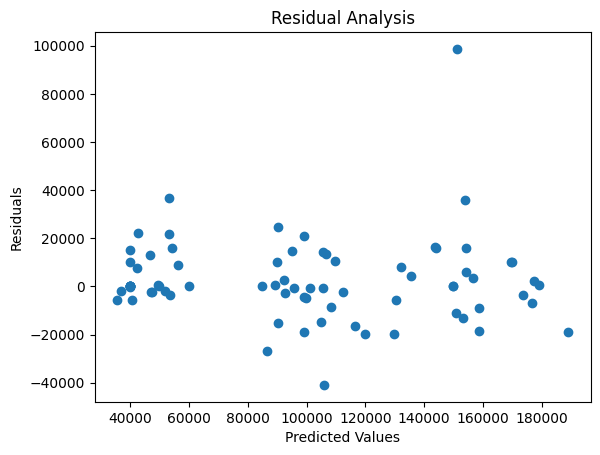

Cross-validated RMSE scores: [23443.60732025 25047.66632464 10268.69998526 11071.92748648
 13686.83299033]


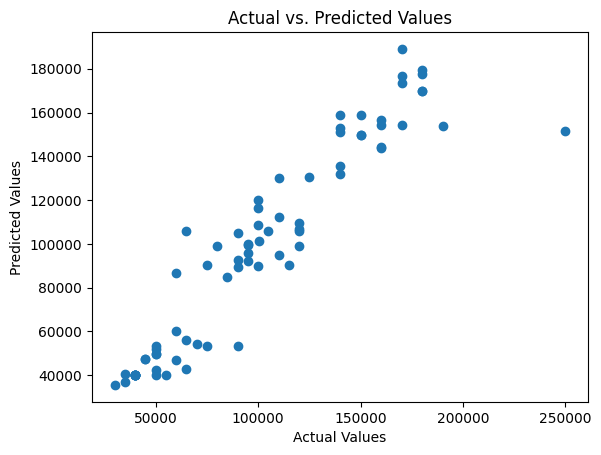

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados
dados = pd.read_csv('dados_limpos.csv')

# Separar variáveis independentes (X) e variável de resposta (Y)
X = dados.drop('Salary', axis=1)
Y = dados['Salary']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Definir as colunas que precisam de tratamento especial (numéricas e categóricas)
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Construir o transformador para aplicar as etapas de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),        # Normalização para variáveis numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)  # Codificação one-hot com handle_unknown
    ])

# Modelo de machine learning
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Pipeline para agrupar as etapas do pré-processamento e o modelo de machine learning
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Treinar o modelo
pipeline.fit(X_train, Y_train)

# Fazer previsões
predictions = pipeline.predict(X_test)

# Avaliação do Modelo
mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Análise de Resíduos
residuals = Y_test - predictions
plt.scatter(predictions, residuals)
plt.title('Residual Analysis')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Validação Cruzada
cv_scores = cross_val_score(pipeline, X, Y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE scores: {cv_rmse_scores}')

# Visualização
plt.scatter(Y_test, predictions)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()




*   **Avaliação do modelo usando métricas de desempenho.**

Mean Squared Error (MSE):

MSE é a média dos quadrados dos erros entre os valores previstos e os valores reais. Nesse caso, o MSE é de aproximadamente 304,874,946.14. Isso significa que, em média, os quadrados dos erros de previsão são dessa ordem de grandeza.

Mean Absolute Error (MAE):

MAE é a média dos valores absolutos dos erros entre os valores previstos e os valores reais.
Nesse caso, o MAE é de aproximadamente 10,659.66. Isso indica que, em média, os erros absolutos de previsão são dessa ordem de grandeza.

R-squared (R²):

R² é uma medida de quanto a variação no resultado pode ser explicada pelo modelo. Nesse caso, o R² é de aproximadamente 0.874. Isso sugere que o modelo explica cerca de 87.4% da variabilidade nos dados de teste.

*  **Análise de resíduos para verificar padrões nos erros de previsão.**

*  **Validação cruzada para avaliar o desempenho do modelo em diferentes conjuntos de dados.**
Cross-validated RMSE scores: Validação cruzada usando a métrica de Raiz do Erro Quadrático Médio (RMSE).

Os valores de RMSE para cada fold da validação cruzada são [23443.61, 25047.67, 10268.70, 11071.93, 13686.83]. Esses valores representam as raízes quadradas dos erros médios quadráticos para cada conjunto de dados de validação.

*  **Visualização de valores reais versus valores previstos.**

Em resumo, os resultados indicam que o modelo tem um desempenho geralmente bom, explicando uma parte significativa da variabilidade nos dados de teste.

### **Testando o modelo treinado para analisar novos dados**

In [ ]:
# Novos dados de teste (substitua isso pelos seus próprios dados)
novos_dados = pd.DataFrame({
    'Age': [29],
    'Gender': ['Female'],
    'Education Level': ['PhD'],
    'Job Title': ['Operations Manager'],
    'Years of Experience': [11],
})

# Fazer previsões com o modelo treinado
previsoes_novos_dados = pipeline.predict(novos_dados)

# Exibir as previsões
print(f'Previsões para os novos dados: {previsoes_novos_dados}')


Previsões para os novos dados: [103184.64075067]


In [ ]:
# Novos dados de teste (substitua isso pelos seus próprios dados)
novos_dados = pd.DataFrame({
    'Age': [20],
    'Gender': ['Male'],
    'Education Level': ["Bachelor's"],
    'Job Title': ['Junior Operations Analyst'],
    'Years of Experience': [1],
})

# Fazer previsões com o modelo treinado
previsoes_novos_dados = pipeline.predict(novos_dados)

# Exibir as previsões
print(f'Previsões para os novos dados: {previsoes_novos_dados}')

Previsões para os novos dados: [36700.]


### **Avaliação dos resultados**

*   Há alguma relação entre os parâmetros e os salários?

In [ ]:
# Obter importâncias das características do modelo
importancias_features = pipeline.named_steps['model'].feature_importances_

# Criar um DataFrame para visualizar as importâncias
importancias_df = pd.DataFrame({'Feature': X.columns, 'Importance': importancias_features[:len(X.columns)]})

# Ordenar as características pela importância
importancias_df = importancias_df.sort_values(by='Importance', ascending=False)

# Exibir as importâncias
print(importancias_df)


               Feature  Importance
0                  Age    0.583389
1               Gender    0.317601
3            Job Title    0.001550
2      Education Level    0.001053
4  Years of Experience    0.000005


*  Se houver, quão forte é essa relação?



Resposta: coeficiente de determinação R², o modelo explica cerca de 87.4% da variabilidade nos dados de teste.

*  Qual deles mais influencia no salário?




In [ ]:
# Exibir a característica mais importante
print(f'A característica mais importante é: {importancias_df.iloc[0]["Feature"]}')


A característica mais importante é: Age


*   Podemos estimar o salário através dos parâmetros apresentados?



Sim, podemos usar o modelo treinado para fazer previsões usando novos dados

*   Quão acurada pode ser a previsão de salários no futuro?



A acurácia da previsão no futuro dependerá de diversos fatores, incluindo a qualidade dos dados, a estabilidade das relações entre as variáveis ao longo do tempo e a capacidade do modelo em generalizar para novos dados.

Abaixo o gráfico de previsões versus observações reais ao longo do tempo.

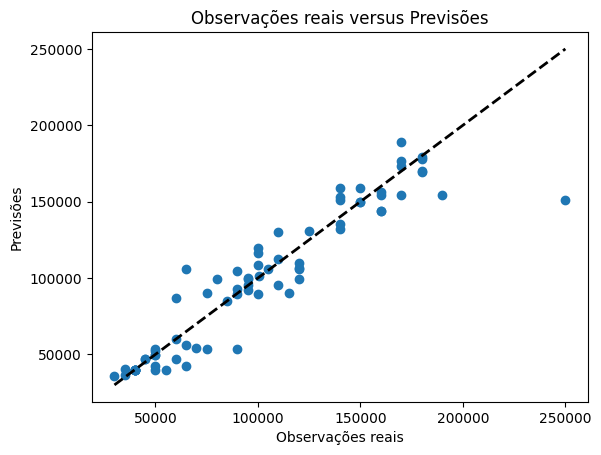

In [ ]:
# Fazer previsões nos dados de teste
predictions = pipeline.predict(X_test)

# Plotar gráfico de previsões versus observações reais
plt.scatter(Y_test, predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--k', linewidth=2)
plt.xlabel('Observações reais')
plt.ylabel('Previsões')
plt.title('Observações reais versus Previsões')
plt.show()
